# Catadioptric Microscope

In [1]:
import numpy as np

from optiland import materials, optic, physical_apertures

In [2]:
class UVReflectingMicroscope(optic.Optic):
    """53x UV Reflecting Objective

    Milton Laikin, Lens Design, 4th ed., CRC Press, 2007, p. 139
    """

    def __init__(self):
        super().__init__()

        silica = materials.IdealMaterial(n=1.4980)
        CaF2 = materials.IdealMaterial(n=1.4610)

        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(index=1, radius=1.72300, thickness=0.0350, material=silica)
        self.add_surface(index=2, radius=2.90631, thickness=0.9731)
        self.add_surface(
            index=3,
            radius=0.17783,
            thickness=-0.4995,
            material="mirror",
            is_stop=True,
        )

        obscuration = physical_apertures.RadialAperture(r_max=np.inf, r_min=0.15)
        self.add_surface(
            index=4,
            radius=0.72913,
            thickness=0.5776,
            material="mirror",
            aperture=obscuration,
        )

        self.add_surface(index=5, radius=2.66996, thickness=0.0427, material=CaF2)
        self.add_surface(index=6, radius=0.48467, thickness=0.005)
        self.add_surface(index=7, radius=0.23767, thickness=0.1861, material=CaF2)
        self.add_surface(index=8, radius=8.64894, thickness=0.005)
        self.add_surface(index=9, radius=7.25758, thickness=0.0588, material=silica)
        self.add_surface(index=10, radius=0.44435, thickness=0.0771)
        self.add_surface(index=11, thickness=0.0071, material=silica)
        self.add_surface(index=12)

        self.set_aperture(aperture_type="imageFNO", value=0.7)

        self.set_field_type(field_type="angle")
        self.add_field(y=0)
        self.add_field(y=2.8)
        self.add_field(y=4)

        self.add_wavelength(value=0.27, is_primary=True)

        self.update_paraxial()

        # scale from inches to mm
        self.scale_system(25.4)

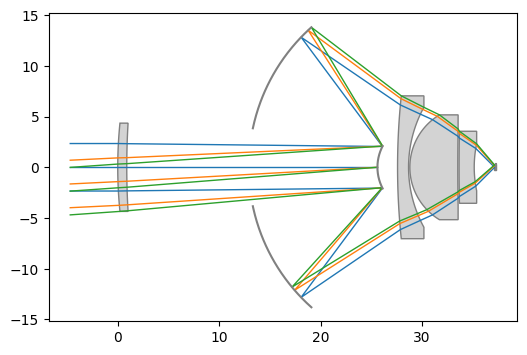

In [3]:
lens = UVReflectingMicroscope()
lens.draw()